# Import Library

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Data

In [2]:
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# EDA (Exploratory Data Analysis)

In [4]:
print("Shape:", df.shape)
df.info()

Shape: (1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
print("Jumlah missing value:")
print(df.isnull().sum())

Jumlah missing value:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [7]:
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


# Preprocessing

In [10]:
X = df.drop(columns=['math score'])
y = df['math score']

In [11]:
df_encoded = df.copy()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded.drop(columns=['math score'])
y = df_encoded['math score']

Insight:
* Dilakukan encoder, karena dataset tersebut hanya data kategorikal biasa

# Feature Scaling

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Insight: 
* Dengan adanya feature scaling, akan membantu model tertentu 

# Splitting Data (Train-Test)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 800
Test size: 200


# Modelling and Evaluation

In [19]:
# Linear Regression
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")

Linear Regression - MAE: 4.13, RMSE: 5.32, R²: 0.88


In [20]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")

Random Forest - MAE: 4.71, RMSE: 6.06, R²: 0.85


Insight: 
* Dari kedua model ini, akan dipilih Random Forest algorithm, karena hasil evaluasi menunjukkan angka lebih tinggi dibanding Linear Regression

# Hyperparamater Tuning with GridSearchCV

In [21]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


# Hasil evaluasi dengan hyperparamater tuning

In [22]:
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest - MAE: {mae_best:.2f}, RMSE: {rmse_best:.2f}, R²: {r2_best:.2f}")

Tuned Random Forest - MAE: 4.69, RMSE: 6.04, R²: 0.85


Insight: 
* Dari hasil tersebut dengan adanya tuning menjadi lebih baik, walau hanya sedikit. Dapat ditunjukkan dari hasil RMSE nya dari 6.06 menjadi 6.04

# Visualisasi Hasil Model

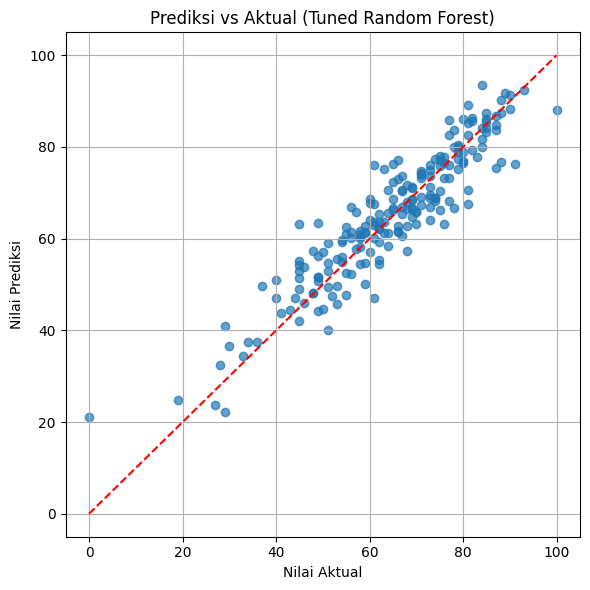

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Prediksi vs Aktual (Tuned Random Forest)")
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.grid()
plt.tight_layout()
plt.show()

Insight:
* Hasil scatter plot menunjukkan model dapat mempredeksi nilai matematika dengan cukup baik ditunjukkan oleh titik yang berada pada garis merah dan hanya beberapa titik saja yang diluar dari garis merah tersebut (ini bisa disebabkan oleh outliers).

# Feature Importance

In [24]:
feature_names = X.columns
importances = best_rf.feature_importances_

feat_importance = pd.DataFrame({
    'Fitur': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_importance

,Fitur,Importance
5,reading score,0.571753
6,writing score,0.239485
0,gender,0.125515
1,race/ethnicity,0.020757
2,parental level of education,0.017323
3,lunch,0.014852
4,test preparation course,0.010315


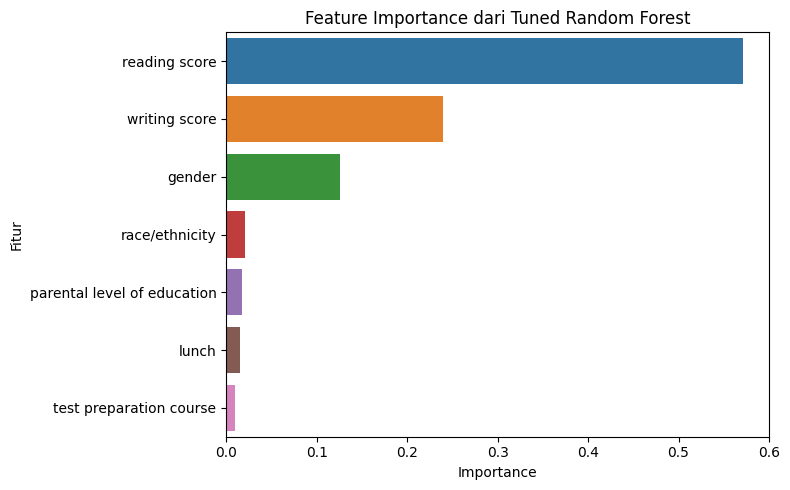

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(data=feat_importance, x='Importance', y='Fitur')
plt.title("Feature Importance dari Tuned Random Forest")
plt.tight_layout()
plt.show()

Insight:
* Dari hasil visualisasi tersebut, dapat ditunjukkan bahwa reading score serta writing score memiliki kontribusi tinggi dalam nilai matematika